# More on Missing Data

## Introduction

While imputing the medan or median are standard methods of dealing with missing values, these standard methods do have caveats. For example, doing so will reduce the overall variance of your dataset which should be taken into account when performing subsequent analyses or training a machine learning algorithm on the dataset.

## Objectives

You will be able to: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values   
- Inspect data for duplicates or extraneous values and remove them

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S


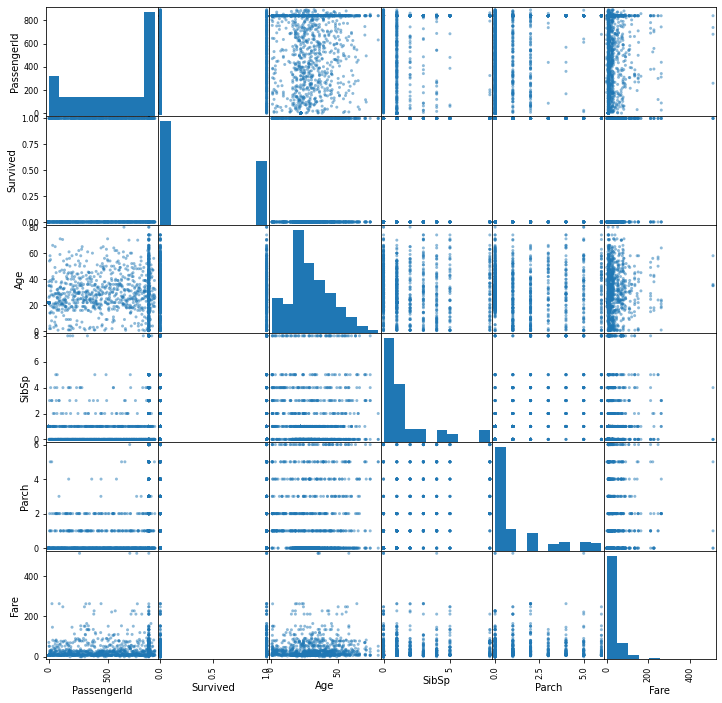

In [3]:
pd.plotting.scatter_matrix(df, figsize=(12,12));

## Check for missing data

Typically, the first step in checking for missing data is to simply use the `.info()` method. This gives us various information about the columns including their data type and the number of non-missing values.

In [4]:
# checking the shape of the data # brian-added
df.shape

(1391, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1391 non-null   float64
 1   Survived     1391 non-null   float64
 2   Pclass       1391 non-null   object 
 3   Name         1391 non-null   object 
 4   Sex          1391 non-null   object 
 5   Age          1209 non-null   float64
 6   SibSp        1391 non-null   float64
 7   Parch        1391 non-null   float64
 8   Ticket       1391 non-null   object 
 9   Fare         1391 non-null   float64
 10  Cabin        602 non-null    object 
 11  Embarked     1289 non-null   object 
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


As you can see, `'Age'` and `'Cabin'` have a substantial amount of missing values, and `'Embarked'` has two extraneous missing values.

In [6]:
# checking the number of values that are missing in each columns 
# brian-added 
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            182
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          789
Embarked       102
dtype: int64

## Check for duplicates

While `df.info()` is a good initial spot check for missing values, it may not catch more subtle anomalies in the data such as duplicates. While these values are populated, it is always worrisome if we have observation rows with identical data.

In [7]:
duplicates = df[df.duplicated()]

print(len(duplicates))
len(duplicates.head()) # 5
duplicates.head()

100


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
892,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
893,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
894,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
895,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S


Similarly, if a feature such as `'PassengerId'` can be assumed to be unique, we can further check if there are duplicate rows based on a subset of the DataFrame columns.

In [8]:
duplicates = df[df.duplicated(subset = 'PassengerId')]

print(f'''Inference: The number of duplicates in the dataset is {(len(duplicates))}.''')
duplicates.tail()

Inference: The number of duplicates in the dataset is 500.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1386,839.0,0.0,?,"Rush, Mr. Alfred George John",male,47.0,0.0,4.0,113510,12.8750,B79,C
1387,839.0,1.0,2,"Skoog, Master. Harald",female,17.0,5.0,5.0,2671,17.4000,E49,NaN
1388,839.0,0.0,?,"Slocovski, Mr. Selman Francis",male,47.0,8.0,4.0,239854,7.0500,B49,NaN
1389,839.0,1.0,?,"Glynn, Miss. Mary Agatha",male,48.0,1.0,0.0,36866,8.6625,F G63,C
1390,839.0,0.0,?,"Sobey, Mr. Samuel James Hayden",male,14.5,3.0,4.0,2672,108.9000,C148,S


## Check for extraneous values

Sometimes, missing values are even further hidden within a dataset. For example, sometimes an entry such as `999999` is used for missing values, or an arbitrary date such as `12-01-1970` might be set for unknown dates. In general, doing a quick eyeball and previewing the top occurring values for each feature can help further tease out peculiarities in the dataset.

In [9]:
# Help - understanding # brian-added
pd.DataFrame.value_counts?

Signature:
pd.DataFrame.value_counts(
    self,
    subset: Union[Sequence[Union[Hashable, NoneType]], NoneType] = None,
    normalize: bool = False,
    sort: bool = True,
    ascending: bool = False,
)
Docstring:
Return a Series containing counts of unique rows in the DataFrame.

.. versionadded:: 1.1.0

Parameters
----------
subset : list-like, optional
    Columns to use when counting unique combinations.
normalize : bool, default False
    Return proportions rather than frequencies.
sort : bool, default True
    Sort by frequencies.
ascending : bool, default False
    Sort in ascending order.

Returns
-------
Series

See Also
--------
Series.value_counts: Equivalent method on Series.

Notes
-----
The returned Series will have a MultiIndex with one level per input
column. By default, rows that contain any NA values are omitted from
the result. By default, the resulting Series will be in descending
order so that the first element is the most frequently-occurring row.

Examples
-----

In [25]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

PassengerId 
 839.0    0.288282
1.0      0.072610
881.0    0.000719
757.0    0.000719
195.0    0.000719
Name: PassengerId, dtype: float64 


Survived 
 0.0    0.618979
1.0    0.381021
Name: Survived, dtype: float64 


Pclass 
 3    0.475198
1    0.219267
2    0.199137
?    0.106398
Name: Pclass, dtype: float64 


Name 
 Braund, Mr. Owen Harris                      0.072610
Stone, Mrs. George Nelson (Martha Evelyn)    0.003595
Butler, Mr. Reginald Fenton                  0.002876
Chapman, Mr. John Henry                      0.002876
Maioni, Miss. Roberta                        0.002876
Name: Name, dtype: float64 


Sex 
 male      0.641265
female    0.358735
Name: Sex, dtype: float64 


Age 
 22.0    0.106700
18.0    0.029777
24.0    0.029777
25.0    0.023987
30.0    0.023160
Name: Age, dtype: float64 


SibSp 
 0.0    0.473041
1.0    0.263120
2.0    0.060388
3.0    0.057513
8.0    0.055356
Name: SibSp, dtype: float64 


Parch 
 0.0    0.595255
1.0    0.125090
2.0    0.099209
4.0    0.0

You can see that we've uncovered another case of missing data that did not show up before. The `'Pclass'` feature has `?` for roughly 10% of the entries.

## Choosing a methodology

How do you choose which method for dealing with missing data to use? The answer will depend on the scenario and specifics to the application itself. As a general rule of thumb, we tend towards imputing values rather than dropping them, as we wish to use as much information as possible. That said, larger gaps where data is missing can pose more substantial problems, and thereby warrant alternative approaches. We'll take a look at specific cases below in more detail, but here's a quick table of your options.

|         | Continuous          | Categorical  |
| ------------- |:-------------:| -----:|
| Delete      | Delete rows (observations) <br> Delete column (entire variable)| Delete rows (observations) <br> Delete column (entire variable)|
| Replace | replace using median/mean | replace using mode
| Keep | keep as NA (not possible for many ML algorithms) | NA category

## Imputing values

Imputing values is often a go to option when dealing with missing data. For example, if we are building a machine learning model with the data, many algorithms cannot handle missing values. By imputing data, we still get to use the full extent of the data at hand without having to throw away data, which, as you know, is an easy option.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1391 non-null   float64
 1   Survived     1391 non-null   float64
 2   Pclass       1391 non-null   object 
 3   Name         1391 non-null   object 
 4   Sex          1391 non-null   object 
 5   Age          1209 non-null   float64
 6   SibSp        1391 non-null   float64
 7   Parch        1391 non-null   float64
 8   Ticket       1391 non-null   object 
 9   Fare         1391 non-null   float64
 10  Cabin        602 non-null    object 
 11  Embarked     1289 non-null   object 
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


## Considerations when imputing

When imputing missing values, keep in mind that you are influencing the distribution of this variable. For example, if you impute the mean, you will reduce the variance of that feature. 

## When to drop rows


Dropping rows is an appropriate choice if there are very few missing values to start with. After all, we do not wish to throw away troves of data if we have it, so cases in which there are larger occurrences of missing values, dropping all occurrences is typically inadvisable.

## When to drop columns

Dropping columns is typically a last case resort. That said, if a feature does not add predictive value to the machine learning algorithm driving your application, dropping said feature has no cost.

A few simple lines such as this can easily subset your DataFrame:  
~~~
cols_to_remove = ['col1', 'col2']
cols = [col for col in df.columns if col not in cols_to_remove]
subset = df[cols]
~~~

## Summary

In this lesson, we took a look at methods for identifying duplicate data as well as missing data that is not null, but filled with a placeholder value (such as `?`).